# Verification code function

In [55]:
class ImageVerify:
    '''class of Image verification code'''
    def __init__(self,length=4,width=140,height=40,size=30):
        self.length = length
        self.width = width
        self.height = height
        self.size = size

    def random_str(self):
        '''
        Construct a random string
        26 uppercase and lowercase letters and 10 numbers as the data source
        :return:
        '''
        #Get all uppercase and lowercase letters
        source = string.ascii_letters+''.join([str(i) for i in range(0,10)])
        return ''.join(random.sample(source,self.length))

    def random_color(self,start=0,end=255):
        '''
        Random RGB colors
        :param start:
        :param end:
        :return:
        '''
        res = (random.randint(start,end) for i in range(3))
        return tuple(res)

    def random_lines(self,draw):
        for i in range(self.length):
            lines = [(random.randint(0,self.width),random.randint(0,self.height))for i in range(2)]
            draw.line(list(lines),fill=self.random_color(start=0,end=200),width=2)

    def random_noise(self,draw,rate):
        '''

        :param draw: brush
        :param rate: The frequency of the noise
        :return:
        '''
        for x in range(self.width):
            for y in range(self.height):
                if random.randint(1,100) <= rate:
                    draw.point((x,y),fill=self.random_color(start=0,end=200))

    def verify_code(self):
        '''
        Generate verification code image
        :return:
        '''
        #Create Canvas
        #The first parameter is the color channel, the second parameter is the tuple, width and height, and the third is the RGB color value
        image = Image.new('RGB',(self.width,self.height),(255,255,255))

        #Creating a font object
        #file_path = os.path.dirname(r'C:\Users\junez\OneDrive\Desktop\Ver_code') #The path of the current file
        #font = ImageFont.truetype(f'{file_path}/HYYakuHei-85W.ttf',self.size)
        #font = ImageFont.load_default().font_variant(size=self.size)
        font = ImageFont.truetype("arial.ttf", size=30, index=0, encoding="", layout_engine=None)


        #Creating a Brush Object
        draw = ImageDraw.Draw(image)

        self.random_lines(draw)
        self.random_noise(draw,10)

        code = self.random_str()
        #print(code,'This is the letter that calls the function')
        for i in range(self.length):
            #print(code[i],'This is the added letter')
            draw.text((random.randint(30,35) *i,random.randint(0,5)),code[i],font=font,\
                      fill=self.random_color(end=200))

        #Blur filter
        image = image.filter(ImageFilter.DETAIL)

        return image,code

# pandas GUI

In [56]:
class PandasWindow:
    def __init__(self):
        self.aa = Padans_data()
        self.alldata,self.uname = self.aa.data_set()
        self.root = tk.Tk()
        self.root.geometry('800x400')
        self.new_window()
        
    def Exit(self):
        self.root.destroy()

    def exit(self):
        self.root1.destroy()
        
    def filemenu(self):
        pass

    def new_window(self):  
        self.menubar=tk.Menu(self.root)
        self.filemenu=tk.Menu(self.menubar,tearoff=0)
        self.menubar.add_cascade(label='Exit',menu=self.filemenu)
        self.filemenu.add_command(label='Exit',command=self.Exit)
        self.root.config(menu=self.menubar)
        self.labelframe=LabelFrame(self.root,text='Basic Operation')
        self.labelframe.pack(side='left')
        v=tk.IntVar()
        r1=tk.Radiobutton(self.labelframe,text='Time Series',variable=v,value=1,command=self._1)
        r1.pack(anchor="w")
        r2=tk.Radiobutton(self.labelframe,text='Bar Chart',variable=v,value=2,command=self._2)
        r2.pack(anchor="w")
        r3=tk.Radiobutton(self.labelframe,text='Bar Chart2',variable=v,value=3,command=self._3)
        r3.pack(anchor="w")
        self.root.mainloop()

    def Convert(self,para1,para2):
        self.canvas=FigureCanvasTkAgg(para1,para2)
        self.canvas.draw() 
        cv=self.canvas.get_tk_widget()
        cv.pack(side=tk.RIGHT, fill=tk.X, expand=1)
        toolbar=NavigationToolbar2Tk(self.canvas,para2) 
        toolbar.update()
        self.canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH,expand=1)


    def _1(self):
        self.display()
        yscrollbar=Scrollbar(self.root1)
        yscrollbar.pack(side='right',fill='y')
        self.text=Text(self.labelframe2,width=80,height=50,yscrollcommand=yscrollbar.set)
        self.text.pack()
        yscrollbar.config(command=self.text.yview)
        yscrollbar.pack()
        self.display1(self.uname,self._1event,'Product')

    def _1event(self,event):
        # company=self.Listchoose.get()
        # self.text.delete('1.0','end')
        # self.labelframe1['text']=company
        # names=self.alldata[self.alldata['Campaigns']==company]['name'].unique()
        # for name in names:
        #     self.text.insert(END,name+'\n\n')
        # fig,ax = self.aa.update_plot()
        # canvas = FigureCanvasTkAgg(fig, master=self.labelframe2) 
        # aa.draw()
        # canvas.draw()
        # canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        selected_company = self.Listchoose.get()
        # if self.text:
        #     self.text.delete('1.0', 'end')
        self.labelframe1['text'] = selected_company

        # Clear the previous canvas
        for widget in self.labelframe2.winfo_children():
            widget.destroy()

        fig, ax = self.aa.update_plot(selected_company)
        canvas = FigureCanvasTkAgg(fig, master=self.labelframe2)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        toolbar = NavigationToolbar2Tk(canvas, self.labelframe2)
        toolbar.update()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        
        # selected_company = self.Listchoose.get()
        # if hasattr(self, 'text') and self.text:
        #     self.text.delete('1.0', 'end')
        # self.labelframe1['text'] = selected_company
    
        # Clear the previous canvas
        # for widget in self.labelframe2.winfo_children():
        #     if isinstance(widget, FigureCanvasTkAgg):
        #         widget.get_tk_widget().destroy()
        # for widget in self.labelframe2.winfo_children():
        #     widget.destroy()

        # fig, ax = self.aa.update_plot(selected_company)
        # fig.clf()
        # canvas = FigureCanvasTkAgg(fig, master=self.labelframe2)
        # canvas.draw()
        # canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        # toolbar = NavigationToolbar2Tk(canvas, self.labelframe2)
        # toolbar.update()
        # canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        # self.labelframe2.destroy()
        # self.labelframe2=LabelFrame(self.labelframe1,text='Display Area',height=700,width=750)
        # self.labelframe2.pack(side='right')
        # self.labelframe2.pack_propagate(0)
        # name=self.Listchoose.get()
        # self.labelframe1['text']=name

        # x, x1, y, y2, y3, y4, Ave = self.aa.update_plot(name)
        # self.fig2, ax = plt.subplots(2, figsize=(8, 15))
        # self.fig2.clf()

        #  # Plot Clicks and Orders on the first subplot
        # ax[0].plot(x1, y, marker='o', label='Clicks')
        # ax[0].plot(x1, y2, marker='o', label='Orders')
        # ax[0].legend(loc='upper left', fontsize='medium')
        
        # # Plot ClickPerOrder on the second subplot
        # ax[1].plot(x1, y3, marker='o', label='ClickPerOrder')
        # ax[1].plot(x1, y4,label='Average clicks',c='red')
        # ax[1].legend(loc='upper left', fontsize='medium')
        
        
        # # Adjust the layout and labels for all subplots
        # ax[0].set_title(name)
        # ax[0].set_xlabel('Day')
        # ax[0].set_ylabel('Click & Order')
        # ax[0].grid(True)
        # y_major_locator = MultipleLocator(1)
        # ax[0].yaxis.set_major_locator(y_major_locator)
    
        # ax[1].set_xlabel('Day')
        # ax[1].set_ylabel('Click/Order')
        # plt.text(1,Ave+0.1, round(Ave,2), color='red', ha='right', va='bottom')
    
        # ax[1].grid(True)
        # y_major_locator2 = MultipleLocator(0.2)

        # self.Convert(self.fig2, self.labelframe2)

    def _2(self): 
        self.display()  
        self.display2(self.uname,self._2event,'Product')
        
    def _2event(self,event):
        selected_company = self.Listchoose.get()
        # if self.text:
        #     self.text.delete('1.0', 'end')
        self.labelframe1['text'] = selected_company

        # Clear the previous canvas
        for widget in self.labelframe2.winfo_children():
            widget.destroy()

        fig, ax = self.aa.bar_plot(selected_company)
        # canvas = FigureCanvasTkAgg(fig, master=self.labelframe2)
        # canvas.draw()
        # canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        # toolbar = NavigationToolbar2Tk(canvas, self.labelframe2)
        # toolbar.update()
        # canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        self.Convert(fig, self.labelframe2)
        
    
    def display(self):
        self.root1 = tk.Tk()
        self.root1.geometry('1000x800')
        self.labelframe1 = LabelFrame(self.root1, text='Window', height=900, width=700)
        self.labelframe1.pack(fill='both', padx=5, pady=5)
        self.labelframe1.pack_propagate(0)
        self.labelframe2 = LabelFrame(self.labelframe1, text='Display Area', height=700, width=750)
        self.labelframe2.pack(side='right')
        self.labelframe2.pack_propagate(0)
        self.labelframe3 = LabelFrame(self.labelframe1, text='Operation Area', width=230)
        self.labelframe3.pack(side='left', fill='y')
        self.labelframe3.pack_propagate(0)
    
        # Initialize self.text here
        yscrollbar = Scrollbar(self.root1)
        yscrollbar.pack(side='right', fill='y')
        self.text = Text(self.labelframe2, width=80, height=50, yscrollcommand=yscrollbar.set)
        self.text.pack()
        yscrollbar.config(command=self.text.yview)
        yscrollbar.pack()
        
    def display1(self,value_name,func,fir_msg):  
        number=tk.StringVar()
        self.Listchoose=ttk.Combobox(self.labelframe3,width=150,height=40,textvariable=number,state='readonly')
        self.Listchoose['values']=list(value_name)    
        self.Listchoose.bind("<<ComboboxSelected>>",func)
        self.Listchoose.set(fir_msg)  
        self.Listchoose.pack() 
        self.button=Button(self.labelframe3, width=27, height=1, text="Exit", bg='#FFD700',font=("Arial", 12),command=self.exit)
        self.button.pack()

    def display2(self,value_name,func,fir_msg):
        number=tk.StringVar()
        self.Listchoose=ttk.Combobox(self.labelframe3,width=150,height=40,textvariable=number,state='readonly')
        self.Listchoose['values']=[i for i in range(10)]    
        self.Listchoose.bind("<<ComboboxSelected>>",func)
        self.Listchoose.set(fir_msg)  
        self.Listchoose.pack() 
        self.button=Button(self.labelframe3, width=27, height=1, text="Exit", bg='#FFD700',font=("Arial", 12),command=self.exit)
        self.button.pack()

    #Add buttons to star and flaw images
    def display3(self,value_name,func,fir_msg):
        number=tk.StringVar()
        self.Listchoose=ttk.Combobox(self.labelframe3,width=150,height=40,textvariable=number,state='readonly')
        self.Listchoose['values']=['Star','Last']    
        self.Listchoose.bind("<<ComboboxSelected>>",func)
        self.Listchoose.set(fir_msg)  
        self.Listchoose.pack() 
        self.button=Button(self.labelframe3, width=27, height=1, text="Exit", bg='#FFD700',font=("Arial", 12),command=self.exit)
        self.button.pack()


    def _3(self):
        self.display()
        self.display3(self.uname,self._3event,'Product Type')



    def _3event(self,event,star=None):
        self.labelframe2.destroy()
        self.labelframe2=LabelFrame(self.labelframe1,text='Display Area',height=700,width=750)
        self.labelframe2.pack(side='right')
        self.labelframe2.pack_propagate(0)
        alldata=self.alldata

        name=self.Listchoose.get()
        self.labelframe1['text']=name
        star = name
        print(star)

        #self.figure=plt.figure()
        #self.fig, ax = plt.subplots(1, figsize=(10,15))
        self.fig=plt.figure()
        self.fig.clf()
        #matplotlib.rcParams["font.family"] = "SimHei"

        
        filtered_data = alldata[['Campaigns','Clicks','Orders']]  
        filtered_data1 = filtered_data.groupby('Campaigns')[['Clicks','Orders']].sum()
        filtered_data1['ClickPerOrder'] = [i / j if j > 0 else 0 for i, j in zip(filtered_data1['Clicks'], filtered_data1['Orders'])]
        if star == 'Star':
            filtered_data3 = filtered_data1[(filtered_data1['Orders'] !=0) & (filtered_data1['Clicks'] >1) ].sort_values(by=['ClickPerOrder'],ascending=True).iloc[:10,:]
        else:
            filtered_data3 = filtered_data1.sort_values(by=['ClickPerOrder'],ascending=[False]).iloc[:10,:]
            


        x1 = filtered_data3.index.tolist()
        y1 = filtered_data3['ClickPerOrder'].tolist()
        
        plt.barh(x1, y1,color='#f9766e')
        plt.title('Click per Order -- Clicks / Orders')
        plt.yticks(fontsize=5)
        
        for i, val1 in enumerate(y1):
            plt.text(val1*4/5, i, round(val1, 2), ha='center', va='bottom', fontsize=10)
        
        self.Convert(self.fig, self.labelframe2)
    
        '''x1 = filtered_data3.index
        y1 = filtered_data3['ClickPerOrder']
        # Plot Clicks and Orders on the first subplot
        #ax.barh(x1,y1, label='Clicks',color='#f9766e',edgecolor='k',zorder=2)
        plt.title('Click per Order -- Clicks / Orders')
        plt.yticks(fontsize=5)
        for i, val1 in enumerate(y1):
            plt.text(x1[i], val1 + 0.1, round(val1,2), ha='center', va='bottom', fontsize=10)
        plt.barh(x1,y1)
        self.Convert(self.fig,self.labelframe2)'''


# padans dataset

In [57]:
import os,sys
import re
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt # The plotting library
import numpy as np 
from matplotlib.pyplot import MultipleLocator
# Magic command for showing plot inline
%matplotlib inline 
import mplcursors
import ipywidgets as widgets
from ipywidgets import interact


class Padans_data:
    def __init__(self):
        pass

    def data_set(self):
        self.data_total = pd.DataFrame()
        path=r'C:\Users\linz\OneDrive\Desktop\Amazon AdApril'
        for file in os.listdir(path):
            match = re.findall(r'(\d+)\.csv', file)
            file_path = os.path.join(path,file)
            data = pd.read_csv(file_path)
            data['datetime'] = f'2024.04.{match[0]}'
            data['datetime']=pd.to_datetime(data['datetime'], format='%Y.%m.%d')
            data = data[['State','Campaigns','Budget(USD)','Clicks','Spend(USD)','CPC(USD)','Orders','Sales(USD)','datetime']]
           #display(data.head())
            if self.data_total.empty:
                self.data_total = data
            else:
                self.data_total = pd.concat([data, self.data_total], axis=0, sort=False, join='outer')
        self.company=self.data_total['Campaigns'].unique()
        return self.data_total,self.company

    def update_plot(self,selected_variable):
        self.data_total,company= self.data_set()
        filtered_data = self.data_total[self.data_total['Campaigns'] == selected_variable].sort_values(by='datetime')
        #filtered_data['day'] = filtered_data['datetime'].str[:4]
        
        filtered_data['day'] = filtered_data['datetime'].dt.day.astype(str)
        filtered_data['ClickPerOrder'] = [i / j if j > 0 else 0 for i, j in zip(filtered_data['Clicks'], filtered_data['Orders'])]
        
        x =filtered_data['datetime']
        x1 = filtered_data['day']
    
        
        y = filtered_data['Clicks']
        y2 = filtered_data['Orders']
        y3 = filtered_data['ClickPerOrder']
        #Average clicks per order for product
        Ave = filtered_data['Clicks'].sum() / filtered_data['Orders'].sum()
        y4 = [Ave for i in range(len(x1))]
        #return x, x1, y, y2, y3, y4, Ave
        fig, ax = plt.subplots(2, figsize=(8, 15))  # Create subplots with 3 rows
    
        # Plot Clicks and Orders on the first subplot
        ax[0].plot(x1, y, marker='o', label='Clicks')
        ax[0].plot(x1, y2, marker='o', label='Orders')
        ax[0].legend(loc='upper left', fontsize='medium')
        
        # Plot ClickPerOrder on the second subplot
        ax[1].plot(x1, y3, marker='o', label='ClickPerOrder')
        ax[1].plot(x1, y4,label='Average clicks',c='red')
        ax[1].legend(loc='upper left', fontsize='medium')
        
        
        # Adjust the layout and labels for all subplots
        ax[0].set_title(selected_variable)
        ax[0].set_xlabel('Day')
        ax[0].set_ylabel('Click & Order')
        ax[0].grid(True)
        y_major_locator = MultipleLocator(1)
        ax[0].yaxis.set_major_locator(y_major_locator)
    
        ax[1].set_xlabel('Day')
        ax[1].set_ylabel('Click/Order')
        plt.text(1,Ave+0.1, round(Ave,2), color='red', ha='right', va='bottom')
    
        ax[1].grid(True)
        y_major_locator2 = MultipleLocator(0.2)
        #ax[1].yaxis.set_major_locator(y_major_locator2)
        
        plt.subplots_adjust(hspace=0.1)  # Adjust the vertical space between subplots
        
        #plt.show()
        return fig, ax

    def draw(self):
        data,company= self.data_set()
        # Create a dropdown widget for variable selection
        variable_dropdown = widgets.Dropdown(
            options=data['Campaigns'].unique(),
            description='Select Variable:'
        )
        
        # Use interact to link the dropdown widget with the update_plot function
        interact(self.update_plot, selected_variable=variable_dropdown)

    def bar_plot(self,num=None):
        data_total,company= self.data_set()
        #Get the required table
        filtered_data0 = data_total[['Campaigns','Clicks','Orders']]
        #Aggregate the total number of clicks and purchases of the same product within a month
        filtered_data1 = filtered_data0.groupby('Campaigns')[['Clicks','Orders']].sum()
        #TOP10 Chart
        filtered_data2 = filtered_data1.sort_values(by=['Orders','Clicks'],ascending=[False,True])
        filtered_data3 = filtered_data2.iloc[:10,:]
        #LAST 10 Chart
        filtered_data4 = filtered_data1.sort_values(by=['Orders','Clicks'],ascending=[True,False])
        filtered_data5 = filtered_data4.iloc[:10,:]
        # display(filtered_data0)
        # display(filtered_data1)
        display(filtered_data3)
        display(filtered_data5)
        #print(len(filtered_data3))
        
        #Draw a chart for TOP10
        #Set the horizontal axis length to 3 times the total number of products counted, 
        #with a step length of 3, so there is enough distance for comparison
        x = np.arange(0,len(filtered_data3)*3,3)
        #Sets the distance between two contrasting effects
        width=1
        #x is array, direct addition and subtraction will translate all coordinates
        x1 = x-width/2
        x2 = x+width/2 
    
        #TOP10 Clicks and Purchases per Product
        y1 = filtered_data3['Clicks']
        y2 = filtered_data3['Orders']  
    
        fig, ax = plt.subplots(2, figsize=(15,15))  # Create subplots with 3 rows
    
        # Plot Clicks and Orders on the first subplot
        ax[0].bar(x1,y1, label='Clicks',color='#f9766e',edgecolor='k',zorder=2)
        ax[0].bar(x2,y2, label='Orders',color='#00bfc4',edgecolor='k',zorder=2)
        
        #The upper left corner distinguishes by the color
        ax[0].legend(loc='upper left', fontsize='medium')
    
        #Set the x-axis coordinate position
        ax[0].set_xticks(x)
        ax[0].set_xticklabels(filtered_data3.index, rotation=45, ha='right',fontsize=5)
        ax[0].set_title('TOP 10 Product')
    
        #Set text for all histograms to be intuitive
        for i, (val1, val2) in enumerate(zip(y1, y2)):
            ax[0].text(x1[i], val1 + 0.1, str(val1), ha='center', va='bottom', fontsize=10)
            ax[0].text(x2[i], val2 + 0.05 * max(y2), str(val2), ha='center', va='bottom', fontsize=10)
    
        
        #Draw a chart for LAST10    
        y3 = filtered_data5['Clicks']
        y4 = filtered_data5['Orders']  
    
        ax[1].bar(x1,y3, label='Clicks',color='#00BFFF',edgecolor='k',zorder=2)
        ax[1].bar(x2,y4, label='Orders',color='#FF69B4',edgecolor='k',zorder=2)
        
        # ax[0].plot(x1, y2, marker='o', label='Orders')
        ax[1].legend(loc='upper right', fontsize='medium')
    
        #Set the product name of the y-axis coordinate
        ax[1].set_xticks(x)
        ax[1].set_xticklabels(filtered_data5.index, rotation=45, ha='right',fontsize=5) 
        ax[1].set_title('LAST 10 Product')
    
        for i, (val1, val2) in enumerate(zip(y3, y4)):
            ax[1].text(x1[i], val1 + 0.1, str(val1), ha='center', va='bottom', fontsize=10)
            ax[1].text(x2[i], val2 + 0.05 * max(y2), str(val2), ha='center', va='bottom', fontsize=10)
            
        #Adjust the distance between two images
        plt.subplots_adjust(hspace=0.5)
        return fig, ax

# Login Window

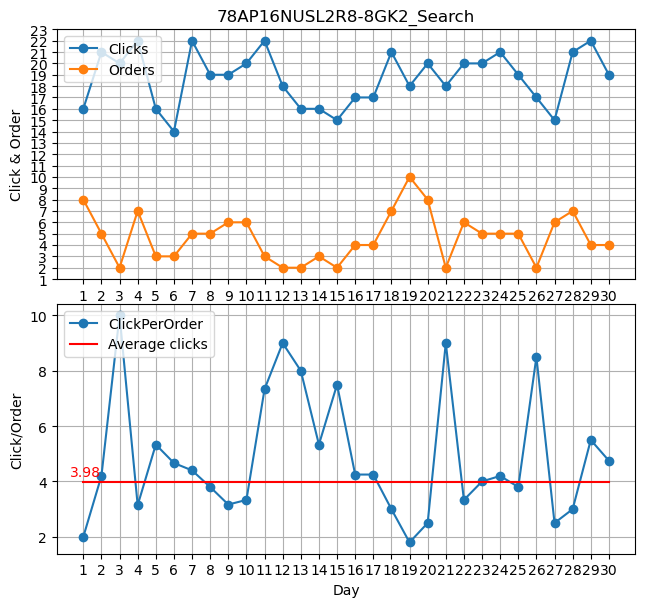

In [58]:
import random
import tkinter as tk
from tkinter import *
from tkinter import messagebox
import string
import random
from PIL import Image, ImageFont, ImageDraw, ImageFilter
import os
from PIL import ImageTk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import NavigationToolbar2Tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib

class Login:
    def __init__(self):
        self.path  =r'test.png'
        
    def createCode(self):
        imageVerify = ImageVerify()
        self.img,self.code = imageVerify.verify_code()
        with open(self.path,'wb') as fp:
            self.img.save(fp)

        #There are two ways to refresh the image, but it is important to make sure imgLabel.image = photo, 
        #otherwise the object will be discarded as garbage.
        '''photo = tk.PhotoImage(file=self.path)#file：
        imgLabel = tk.Label(self.root,image=photo)
        imgLabel.image = photo
        imgLabel.place(x=260,y=60)'''
        image = Image.open(self.path)

        # Convert the PIL Image to a Tkinter PhotoImage
        photo = ImageTk.PhotoImage(image)
    
        # Create a Label to display the image
        imgLabel = tk.Label(self.root, image=photo)
        imgLabel.image = photo  # Keep a reference to avoid garbage collection
        imgLabel.place(x=280, y=110,height=30)
        
    def confirm(self):
        #t1 = self.code
        t2 = self.text.get()
        user = self.usr.get()
        pawd = self.pwd.get()
        #if (t1.upper() == t2.upper() or t1.lower() == t2.lower()) and user=='timetec' and pawd == '1911':  # Ignore case
        if True:
            messagebox.showinfo('window', 'Verification Success')  # Pop-up prompt box  
            self.root.destroy()
            aa = PandasWindow()
        else:
            messagebox.showerror('window', 'verification failed')
        # except:
        #     messagebox.showerror('window', 'verification failed')
            
    def GUI(self):
        '''Main Program'''
        self.root = Tk()
        self.root.geometry('500x350')
        code = Label(self.root, text='  Verification Code：', fg='black')
        code.place(x=55, y=115, width=110, height=20)  #Verification code location
        self.text = ttk.Entry(self.root)
        self.text.place(x=170, y=115, width=110, height=20) #Verification code input box location
         
        txt = StringVar()
        txt.set('Get Verification')

        text_code = txt

        #Add verification code image
        # photo = tk.PhotoImage(file=self.path)#file：
        # imgLabel = tk.Label(self.root,image=photo)
        # imgLabel.place(x=260,y=60)
        

        #Username location
        ttk.Label(self.root,text='Username:').place(x=70, y=60, width=60, height=20)
        self.usr = ttk.Entry(self.root)
        self.usr.place(x=170, y=60, width=110, height=20)
        #Password location
        ttk.Label(self.root,text='Password:').place(x=70, y=86, width=60, height=20)
        self.pwd = ttk.Entry(self.root,show='*')
        self.pwd.place(x=170, y=85, width=110, height=20) 
        
        #Get verification code button
        codestr = Button(self.root, textvariable=txt, command=self.createCode, fg='black')
        codestr.place(x=280, y=150, width=100, height=30)
        #Confirm button              
        buttonName = Button(self.root, text='Login', command=self.confirm, fg='blue', bg='lightblue')
        buttonName.place(x=140, y=150, width=50, height=30)
        self.root.mainloop()
        
l1 = Login()
l1.GUI()